In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# 1. Hypersphere

$n$차원에서의 구를 초구(hypershpere)라고 한다. 반지름이 $r$인 2차권 구의 부피(면적)은 $S_2=\pi r^2$, 3차원은 $S_3=\frac{4}{3} \pi r^3$이다. 이를 확장하여 4차원, 5차원 구의 부피를 몬테카를로 방법을 이용하여 추측해보자.

- $n$차원 구의 부피는 $S_n = C_n r^n$이다.
- 따라서 반지름이 1인 구를 생각하면 $S_n=C_n$과 같다.
- 몬테카를로 방법을 이용한 2차원 원의 면적 문제를 응용하여 3, 4, 5차원에서 $C_n$의 근사값을 구하여라.

In [2]:
def hypersphere_3d(n):
    count=0
    for i in range(n):
        x,y,z = random.random(), random.random(), random.random()
        if x*x+y*y+z*z<1:
            count+=1
    return 8*count/n

print(hypersphere_3d(1000))

4.248


In [3]:
def hypersphere_4d(n):
    count=0
    for i in range(n):
        x,y,z,p = random.random(), random.random(), random.random(), random.random()
        if x*x+y*y+z*z+p*p<1:
            count+=1
    return 16*count/n

print(hypersphere_4d(1000))

4.896


In [4]:
def hypersphere_5d(n):
    count=0
    for i in range(n):
        x,y,z,p,q = random.random(), random.random(), random.random(), random.random(), random.random()
        if x*x+y*y+z*z+p*p+q*q<1:
            count+=1
    return 32*count/n

print(hypersphere_5d(1000))

5.056


# 2. Particles in a box

1차원 무한히 깊은 퍼텐셜 상자 (길이 $L$) 안에 있는 양자 입자를 생각해 봅시다. 가능한 에너지 상태는 다음과 같습니다.

$$ E_n = \frac{\pi^2 \hbar^2}{2m L^2} n^2.$$
상호작용하지 않는 입자 총 $N=1000$개가 박스 안에 들어있다고 가정합시다. 또한 문제를 간단히 하기 위해 $2m=\hbar=1$, $L=\pi$로 가정합시다. 그러면$$ E_n = n^2.$$

열적 요동에 의해 입자들은 각자 에너지 상태가 바뀔 수 있습니다. 단 열적 요동이 아주 크지는 않아서 상태는 한 단계씩만 변화한다고 가정해봅시다. 그렇다면 무작위로 고른 하나의 입자의 상태가 바뀌어 에너지 고유값이 한 단계 증가했다면 그 때 에너지 차이는 다음과 같습니다.$$ \Delta E = (n+1)^2- (n)^2 = ( 2 n +1)$$비슷한 방식으로 에너지가 감소했다면 에너지 차이는 다음과 같습니다.$$ \Delta E =( -2 n +1)$$

초기에 모든 입자가 바닥상태(n=1)에 존재하고 있었다고 가정하고 메트로폴리스 알고리즘을 이용하여 온도($\beta$)를 바꾸어가면서

1. 총 에너지 $\sum_{i=1}^{N} E_n = \sum_i n_i^2$
2. 에너지에 따른 입자의 분포를 측정해 봅시다. (즉 볼츠만 분포를 따르는지)


구체적인 알고리즘은 다음과 같습니다.

1. $N$개의 입자 중에 무작위로 하나를 고른다. 고른 입자를 $i$라고 부르자.
2. 입자 $i$의 상태와 에너지를 확인한다. 이를 각각 $n_i$와 $E_i$이라고 하자.
3. 고른 입자 $i$의 나중 에너지 상태를 선택한다. 즉, $1/2$ 확률로 $n_i+1$, 나머지 $1/2$ 확률로 $n_i-1$을 선택한다. 단 입자 $i$가 바닥상태 (에너지가 $E_1$인 상태)에 존재했다면 $1/2$ 확률로 바닥상태에 그대로 머무르고 $1/2$ 확률로 에너지가 $E_2$인 상태로 바꾸기를 시도한다.
4. 입자의 상태를 변화했을 때 에너지를 확인하자. 이를 $E_f$라고 하고 에너지 차이를 구한다. $\Delta E=E_f-E_i$
5. 만약 $\Delta E \le 0$이면 1의 확률로(즉 항상) 상태를 $i$에서 $f$로 바꾼다.
6. 만약 $\Delta E \gt; 0$이면 $e^{-\beta \Delta E}$의 확률로 상태를 $f$로 바꾼다. 즉 0과 1사이의 랜덤넘버를 하나 구해서 이 값이 앞의 확률보다 낮으면 상태를 바꾼다.
7. 이 과정을 반복한다.

In [5]:
def aveE(b,n):
    states = np.ones(n)
    for t in range(n*100):
        i=random.randint(0,n-1)
        DE = -2*states[i]
        if random.random()<1/2:
            DE = -1
        else:
            DE = 1
            
        if DE < 0:
            states[i]=states[i]-1
        elif random.random()<np.exp(-b*DE):
            states[i]=states[i] + 1
        if states[i]==0:
            states[i]=1
    return states

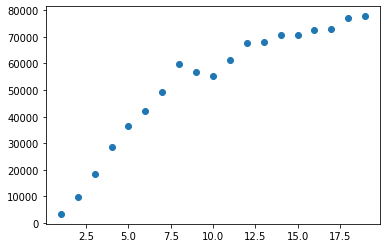

In [6]:
temp=np.arange(1,20,1)
y=[sum(aveE(1/b, 1000)**2) for b in temp]
plt.plot(temp,y,'o')

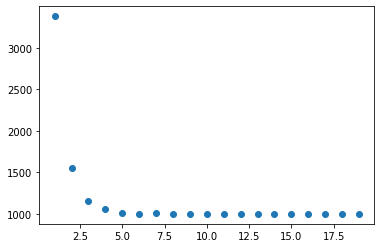

In [7]:
temp=np.arange(1,20,1)
y=[sum(aveE(b, 1000)**2) for b in temp]
plt.plot(temp,y,'o')

In [8]:
def bolt(b,n):
    ct=aveE(b,n)
    nb = np.ones(11)
    for t in range(1,10):
        nb[t]=np.count_nonzero(ct == t)
    return nb

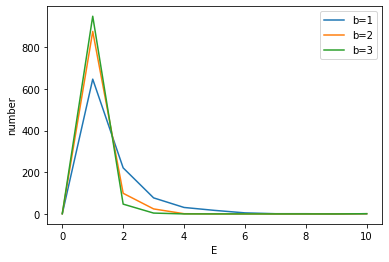

In [12]:
plt.plot(bolt(1,1000),label='b=1')
plt.plot(bolt(2,1000),label='b=2')
plt.plot(bolt(3,1000),label='b=3')
plt.legend()

plt.xlabel("E")
plt.ylabel('number')
plt.show()

볼츠만 분포를 따름

In [ ]:
입자 박스(-5)